Label Target: Total_Returns_NextYear
Models:
    XGBoost Regressor 44.75% | 68,31% | 32.65% | 51.95%
    Random Forest model 69,04% | 73,88% | 72,12% | 70,75% | 56,45% | 56,89%
    NN Neural Network 0,16% | 0,04%
    Linear Regression 74,52% | 71,85% | 115.04%
    Polynomial Regression 82.81% | 91.78% | 95.06%
    Ridge Regression 73.42%

XGBoost Regressor
Option 1.1 == 44.75%

Train until 2022 + test on 2023 Total_Returns to predict Total_Returns_NextYear
Predicted 2023 Total_Returns_NextYear: 338260.3
Actual 2023 Total_Returns_NextYear: 755909.0

*******************
Option 1.2 + log transformation by GPT == 68,31%

Predicted 2023 Total_Returns_NextYear (log adjusted): 516336.2
Actual 2023 Total_Returns_NextYear: 755909.0

*******************
Option 1.3 + using less features top 5 == 32.65%

Predicted 2023 Total_Returns_NextYear: 246804.7
Actual 2023 Total_Returns_NextYear: 755909.0

*******************
option 2 == 51.95%

XGBoost Regressor 80% and 20%
Predicted Total_Returns_NextYear for 2023: 392,723
Actual Total_Returns_NextYear for 2023: 755,909

*******************
option 3 
Random Forest model == 69,04%

Predicted Total_Returns_NextYear for 2023: 521,877
Actual Total_Returns_NextYear for 2023: 755,909

*******************
option 3.1
Random Forest model using only 5 important features  == 73,88%

['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
Predicted Total_Returns_NextYear for 2023: 558,452
Actual Total_Returns_NextYear for 2023: 755,909

*******************
3.1.1
adding a log transform == 72,12%

Random Forest model using only 5 important features
['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
Predicted Total_Returns_NextYear for 2023 (log corrected): 545,149
Actual Total_Returns_NextYear for 2023: 755,909

*******************
option 3.2
Random Forest model using only 10 important features == 70,75%

Predicted Total_Returns_NextYear for 2023: 534,810
Actual Total_Returns_NextYear for 2023: 755,909

*******************
option 4
Blend Random Forest with XGBoost and average their outputs == 56,45%

Only Top 5 features
Blended Prediction (Top 5 Features): 426,680
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 329,229.22

*******************
Option 4.1
Blend Random Forest with XGBoost and average their outputs == 56,89%
using all features
Blended Prediction (All Features): 430,069
Actual Total_Returns_NextYear for 2023: 755,909

*******************
Option 5
NN Neural Network - using TensorFlow == 0,16%
NN Predicted Total_Returns_NextYear for 2023: 1,236
Actual Total_Returns_NextYear for 2023: 755,909

*******************
Option 5.1
NN Neural Network using only top 5 important features == 0.04%
['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']

*******************
Option 6
Linear Regression == 74.52%
Using top 5 important features
Linear Regression Prediction for 2023: 563,289
Actual: 755,909

*******************
Option 6.1
Linear Regression == 71.85%
Using top 10 important features
Linear Regression Prediction for 2023: 543,101
Actual Total_Returns_NextYear for 2023: 755,909

Option 6.2
Linear Regression and Log Transformation 115.04%
Using top 5 features
Prediction: 869,611
Actual: 755,909
% Predicted to Actual: 115.04%

*******************
Option 7
Polynomial Regression == 82.81%
Using only top 3 important features
Prediction: 625,980
Actual: 755,909
% Predicted to Actual: 82.81%

*******************
Option 7.1
Polynomial Regression == 91.78%
Using only top 5 important features
Prediction: 693,756
Actual: 755,909
MAE: 62,153.43

Option 7.2
Polynomial Regression == 95.06%
Using all features
Prediction: 718,542
Actual: 755,909
MAE: 37,366.95

Predicted Total_Returns_NextYear 2025: 679,553

*******************
Option 8:
Ridge Regression == 73.42%
Using top 5 features
Prediction: 555,023
Actual: 755,909
% Predicted to Actual: 73.42%





Use Blending: Average Linear + Tree Model


OPTION 1
df_columbiariver_opt1

Start with XGBoost Regressor
Train until 2022 + 
test on 2023 Total_Returns to predict Total_Returns_NextYear

X_train used to train the mode (all features column's)
Y_train used to train the mode (all label target rows)
X_test used to test the model last year 2023
y_test used to validate the accuracy result vs predict

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset with ReturnYear + ReturnCount
df_columbiariver_opt1 = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')



In [3]:
df_columbiariver_opt1

,River,Year,Total_Returns,AgeClass_0.1,AgeClass_0.2,AgeClass_0.3,AgeClass_0.4,AgeClass_0.5,AgeClass_1.1,AgeClass_1.3,...,mei_mean_AprSep,npgo_mean_DecFeb,ao_mean_DecMar,pdo_mean_DecMar,pdo_mean_MaySep,sst_aprjul,sst_anom,sss_aprjun,sss_mayaug,Total_Spawners_BroodYear
0,Bonneville Lock & Dam,1985,166340.0,0.0,0.0,0.0,0.0,0.0,1461.0,1732.0,...,-0.635000,0.170518,-0.81225,0.3725,0.002,12.268483,-0.464135,NaN,NaN,2.535160e+08
1,Bonneville Lock & Dam,1986,58123.0,0.0,0.0,0.0,0.0,0.0,24062.0,9094.0,...,0.315000,-1.299489,-0.87225,1.1300,0.460,12.450839,-0.281779,NaN,NaN,1.401720e+08
2,Bonneville Lock & Dam,1987,116993.0,0.0,0.0,0.0,0.0,0.0,22999.0,2611.0,...,1.728333,0.332657,-1.07675,1.4975,1.086,12.612856,-0.119761,NaN,NaN,2.072466e+08
3,Bonneville Lock & Dam,1988,79714.0,0.0,0.0,0.0,0.0,0.0,547.0,13259.0,...,-1.160000,0.864786,-0.38300,0.5325,-0.286,12.518272,-0.214346,NaN,NaN,1.737483e+08
4,Bonneville Lock & Dam,1989,41884.0,0.0,0.0,0.0,0.0,0.0,298.0,3809.0,...,-0.896667,0.909874,2.39850,-1.0175,-0.086,12.952309,0.219692,NaN,NaN,2.955481e+08
5,Bonneville Lock & Dam,1990,49581.0,0.0,0.0,0.0,0.0,0.0,7260.0,5001.0,...,0.111667,-0.061326,1.68725,-0.7600,-0.314,12.745895,0.013278,NaN,NaN,2.794689e+08
6,Bonneville Lock & Dam,1991,76481.0,0.0,0.0,0.0,0.0,0.0,4072.0,13678.0,...,0.556667,-0.860520,0.14925,-1.5550,-1.136,11.969433,-0.763185,NaN,NaN,2.716528e+08
7,Bonneville Lock & Dam,1992,84992.0,0.0,0.0,0.0,0.0,0.0,5170.0,5755.0,...,1.026667,-0.058810,1.06725,0.0400,1.056,13.732517,0.999900,NaN,NaN,2.152034e+08
8,Bonneville Lock & Dam,1993,80178.0,0.0,0.0,0.0,0.0,0.0,0.0,8043.0,...,1.011667,-2.275497,1.51750,0.0775,1.686,13.359549,0.626931,NaN,NaN,2.791706e+08
9,Bonneville Lock & Dam,1994,12678.0,0.0,0.0,0.0,0.0,0.0,440.0,8583.0,...,0.526667,-1.944411,0.15675,0.5300,-0.530,12.846726,0.114109,NaN,NaN,2.823149e+08


In [4]:
print(df_columbiariver_opt1.columns)


Index(['River', 'Year', 'Total_Returns', 'AgeClass_0.1', 'AgeClass_0.2',
       'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5', 'AgeClass_1.1',
       'AgeClass_1.3', 'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.1',
       'AgeClass_2.2', 'AgeClass_2.3', 'AgeClass_2.4', 'AgeClass_3.1',
       'AgeClass_3.2', 'AgeClass_3.4', 'Total_Returns_NextYear',
       'Pacea_ALPI_Anomaly', 'npi_mean_NovMar', 'oni_mean_DecFeb',
       'mei_mean_AprSep', 'npgo_mean_DecFeb', 'ao_mean_DecMar',
       'pdo_mean_DecMar', 'pdo_mean_MaySep', 'sst_aprjul', 'sst_anom',
       'sss_aprjun', 'sss_mayaug', 'Total_Spawners_BroodYear'],
      dtype='object')


Checking the null values

In [5]:
print(df_columbiariver_opt1.isnull().sum())


River                        0
Year                         0
Total_Returns                0
AgeClass_0.1                 0
AgeClass_0.2                 0
AgeClass_0.3                 0
AgeClass_0.4                 0
AgeClass_0.5                 0
AgeClass_1.1                 0
AgeClass_1.3                 0
AgeClass_1.4                 0
AgeClass_1.5                 0
AgeClass_2.1                 0
AgeClass_2.2                 0
AgeClass_2.3                 0
AgeClass_2.4                 0
AgeClass_3.1                 0
AgeClass_3.2                 0
AgeClass_3.4                 0
Total_Returns_NextYear       0
Pacea_ALPI_Anomaly           1
npi_mean_NovMar              0
oni_mean_DecFeb              0
mei_mean_AprSep              0
npgo_mean_DecFeb             0
ao_mean_DecMar               0
pdo_mean_DecMar              0
pdo_mean_MaySep              0
sst_aprjul                   0
sst_anom                     0
sss_aprjun                  39
sss_mayaug                  39
Total_Sp

Filling out columns:
Pacea_ALPI_Anomaly and Total_Spawners_BroodYear  using mean (only one value its missing)

In [6]:
df_columbiariver_opt1['Pacea_ALPI_Anomaly'].fillna(df_columbiariver_opt1['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_columbiariver_opt1['Total_Spawners_BroodYear'].fillna(df_columbiariver_opt1['Total_Spawners_BroodYear'].mean(), inplace=True)


droping columns sss_aprjun and sss_mayaug

In [7]:
columns_to_drop = ['sss_aprjun', 'sss_mayaug']
df_columbiariver_opt1 = df_columbiariver_opt1.drop(columns=columns_to_drop)

In [8]:
print(df_columbiariver_opt1.isnull().sum())


River                       0
Year                        0
Total_Returns               0
AgeClass_0.1                0
AgeClass_0.2                0
AgeClass_0.3                0
AgeClass_0.4                0
AgeClass_0.5                0
AgeClass_1.1                0
AgeClass_1.3                0
AgeClass_1.4                0
AgeClass_1.5                0
AgeClass_2.1                0
AgeClass_2.2                0
AgeClass_2.3                0
AgeClass_2.4                0
AgeClass_3.1                0
AgeClass_3.2                0
AgeClass_3.4                0
Total_Returns_NextYear      0
Pacea_ALPI_Anomaly          0
npi_mean_NovMar             0
oni_mean_DecFeb             0
mei_mean_AprSep             0
npgo_mean_DecFeb            0
ao_mean_DecMar              0
pdo_mean_DecMar             0
pdo_mean_MaySep             0
sst_aprjul                  0
sst_anom                    0
Total_Spawners_BroodYear    0
dtype: int64


Check column with total = 0

In [9]:
zero_sum = df_columbiariver_opt1.sum(numeric_only=True)
print(zero_sum[zero_sum == 0])


AgeClass_0.1    0.0
AgeClass_0.2    0.0
AgeClass_0.3    0.0
AgeClass_0.4    0.0
AgeClass_0.5    0.0
AgeClass_1.4    0.0
AgeClass_1.5    0.0
AgeClass_2.4    0.0
AgeClass_3.4    0.0
dtype: float64


In [10]:
df_columbiariver_opt1 = df_columbiariver_opt1.drop(columns=[
    'AgeClass_0.1',
    'AgeClass_0.2',
    'AgeClass_0.3',
    'AgeClass_0.4',
    'AgeClass_0.5',
    'AgeClass_1.4',
    'AgeClass_1.5',
    'AgeClass_2.4',
    'AgeClass_3.4'
])


Correlation with Total_Returns_NextYear:
Total_Returns_NextYear      1.000000
AgeClass_1.1                0.743228
Year                        0.657532
AgeClass_1.3                0.527285
Total_Returns               0.479619
npi_mean_NovMar             0.375074
AgeClass_2.1                0.241898
AgeClass_2.2                0.167918
AgeClass_3.1               -0.078549
ao_mean_DecMar             -0.121911
npgo_mean_DecFeb           -0.122259
AgeClass_3.2               -0.147301
sst_aprjul                 -0.172417
sst_anom                   -0.172417
Pacea_ALPI_Anomaly         -0.175486
mei_mean_AprSep            -0.218337
AgeClass_2.3               -0.236076
oni_mean_DecFeb            -0.237507
Total_Spawners_BroodYear   -0.329821
pdo_mean_MaySep            -0.421949
pdo_mean_DecMar            -0.455388
Name: Total_Returns_NextYear, dtype: float64


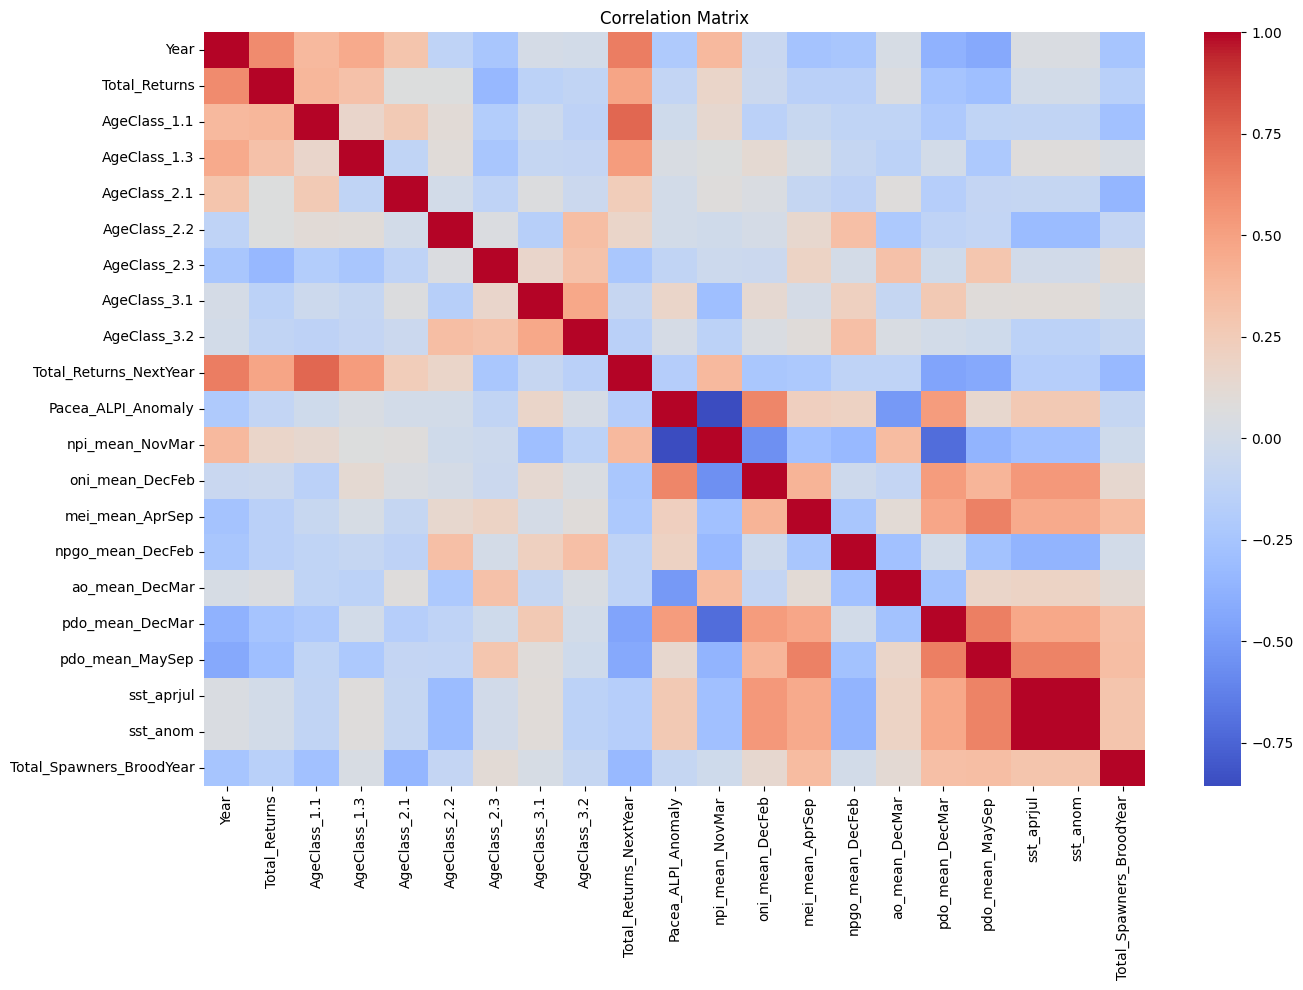

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_columbiariver_opt1.corr(numeric_only=True)

# If you have the 'Total_Returns_NextYear' column, sort by it
if 'Total_Returns_NextYear' in correlation_matrix.columns:
    sorted_corr = correlation_matrix['Total_Returns_NextYear'].sort_values(ascending=False)
    print("Correlation with Total_Returns_NextYear:")
    print(sorted_corr)
else:
    print("🧮 Full Correlation Matrix:")
    print(correlation_matrix)

# (Optional) Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


Option 1.1
df_columbiariver_opt1

Start with XGBoost Regressor
Train until 2022 + 
test on 2023 Total_Returns to predict Total_Returns_NextYear

X_train used to train the mode (all features column's)
Y_train used to train the mode (all label target rows)
X_test used to test the model last year 2023
y_test used to validate the accuracy result vs predict

In [12]:
!pip install xgboost


You should consider upgrading via the 'C:\Users\MuriloFarias\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
# STEP 1: Prepare the features and labels
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [14]:
# Define the target and features
target_col = 'Total_Returns_NextYear'
feature_cols = [col for col in df_columbiariver_opt1.columns if col not in [target_col, 'River']]  # remove non-numer

In [15]:
feature_cols

['Year',
 'Total_Returns',
 'AgeClass_1.1',
 'AgeClass_1.3',
 'AgeClass_2.1',
 'AgeClass_2.2',
 'AgeClass_2.3',
 'AgeClass_3.1',
 'AgeClass_3.2',
 'Pacea_ALPI_Anomaly',
 'npi_mean_NovMar',
 'oni_mean_DecFeb',
 'mei_mean_AprSep',
 'npgo_mean_DecFeb',
 'ao_mean_DecMar',
 'pdo_mean_DecMar',
 'pdo_mean_MaySep',
 'sst_aprjul',
 'sst_anom',
 'Total_Spawners_BroodYear']

In [16]:
# Split into train and test sets
train_df = df_columbiariver_opt1[df_columbiariver_opt1['Year'] <= 2022]
test_df = df_columbiariver_opt1[df_columbiariver_opt1['Year'] == 2023]

X_train used to train the mode (all features column's)
Y_train used to train the mode (all label target rows)
X_test used to test the model last year 2023
y_test used to validate the accuracy result vs predict

In [17]:
X_train = train_df[feature_cols]
y_train = train_df[target_col]

In [18]:
X_train

,Year,Total_Returns,AgeClass_1.1,AgeClass_1.3,AgeClass_2.1,AgeClass_2.2,AgeClass_2.3,AgeClass_3.1,AgeClass_3.2,Pacea_ALPI_Anomaly,npi_mean_NovMar,oni_mean_DecFeb,mei_mean_AprSep,npgo_mean_DecFeb,ao_mean_DecMar,pdo_mean_DecMar,pdo_mean_MaySep,sst_aprjul,sst_anom,Total_Spawners_BroodYear
0,1985,166340.0,1461.0,1732.0,585.0,12143.0,0.0,0.0,0.0,-1.64,1010.006,25.643333,-0.635000,0.170518,-0.81225,0.3725,0.002,12.268483,-0.464135,2.535160e+08
1,1986,58123.0,24062.0,9094.0,510.0,2371.0,158.0,0.0,0.0,5.20,1004.794,26.156667,0.315000,-1.299489,-0.87225,1.1300,0.460,12.450839,-0.281779,1.401720e+08
2,1987,116993.0,22999.0,2611.0,1673.0,12805.0,0.0,0.0,0.0,3.62,1005.968,27.803333,1.728333,0.332657,-1.07675,1.4975,1.086,12.612856,-0.119761,2.072466e+08
3,1988,79714.0,547.0,13259.0,2057.0,5384.0,0.0,0.0,0.0,1.21,1008.134,27.406667,-1.160000,0.864786,-0.38300,0.5325,-0.286,12.518272,-0.214346,1.737483e+08
4,1989,41884.0,298.0,3809.0,523.0,3052.0,210.0,0.0,0.0,-2.68,1011.742,24.930000,-0.896667,0.909874,2.39850,-1.0175,-0.086,12.952309,0.219692,2.955481e+08
5,1990,49581.0,7260.0,5001.0,393.0,7681.0,157.0,0.0,0.0,-0.87,1010.906,26.686667,0.111667,-0.061326,1.68725,-0.7600,-0.314,12.745895,0.013278,2.794689e+08
6,1991,76481.0,4072.0,13678.0,1958.0,342.0,76.0,0.0,0.0,0.45,1011.244,27.036667,0.556667,-0.860520,0.14925,-1.5550,-1.136,11.969433,-0.763185,2.716528e+08
7,1992,84992.0,5170.0,5755.0,2894.0,15129.0,0.0,0.0,0.0,2.14,1006.456,28.363333,1.026667,-0.058810,1.06725,0.0400,1.056,13.732517,0.999900,2.152034e+08
8,1993,80178.0,0.0,8043.0,0.0,5640.0,984.0,0.0,0.0,-0.94,1008.754,26.823333,1.011667,-2.275497,1.51750,0.0775,1.686,13.359549,0.626931,2.791706e+08
9,1994,12678.0,440.0,8583.0,146.0,1503.0,106.0,0.0,0.0,-0.63,1010.356,26.800000,0.526667,-1.944411,0.15675,0.5300,-0.530,12.846726,0.114109,2.823149e+08


In [19]:
y_train

0      58123.0
1     116993.0
2      79714.0
3      41884.0
4      49581.0
5      76481.0
6      84992.0
7      80178.0
8      12678.0
9       8774.0
10     30232.0
11     47008.0
12     13218.0
13     17877.0
14     93398.0
15    114934.0
16     49610.0
17     39291.0
18    123291.0
19     72971.0
20     37066.0
21     24376.0
22    213607.0
23    177823.0
24    386525.0
25    185796.0
26    515673.0
27    185505.0
28    614179.0
29    510706.0
30    342498.0
31     87693.0
32    193816.0
33     63046.0
34    341739.0
35    151765.0
36    663253.0
37    327600.0
Name: Total_Returns_NextYear, dtype: float64

In [20]:
X_test = test_df[feature_cols]
y_test = test_df[target_col]  

In [21]:
X_test

,Year,Total_Returns,AgeClass_1.1,AgeClass_1.3,AgeClass_2.1,AgeClass_2.2,AgeClass_2.3,AgeClass_3.1,AgeClass_3.2,Pacea_ALPI_Anomaly,npi_mean_NovMar,oni_mean_DecFeb,mei_mean_AprSep,npgo_mean_DecFeb,ao_mean_DecMar,pdo_mean_DecMar,pdo_mean_MaySep,sst_aprjul,sst_anom,Total_Spawners_BroodYear
38,2023,327600.0,30066.0,33729.0,744.0,13943.0,0.0,0.0,0.0,0.512895,1011.92,26.063333,0.281667,-1.972965,-0.37825,-1.8875,-2.586,12.512492,-0.220125,2.164430e+08


In [22]:
y_test

38    755909.0
Name: Total_Returns_NextYear, dtype: float64

In [23]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Predict 2023 Total_Returns_NextYear

In [24]:
y_pred_2023 = model.predict(X_test)

print("Predicted 2023 Total_Returns_NextYear:", y_pred_2023[0])
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])

Predicted 2023 Total_Returns_NextYear: 338260.3
Actual 2023 Total_Returns_NextYear: 755909.0


In [25]:
percentage = y_pred_2023/y_test
print("Percentage of Predicted to Actual for 2023: ", round(percentage*100,2))

Percentage of Predicted to Actual for 2023:  38    44.75
Name: Total_Returns_NextYear, dtype: float64


Option 1.2
Based on GPT because we got only 44% of accuracy:
Try log transformation on the target

In [26]:
import numpy as np

# Log-transform the target
y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)

# Predict and invert the log
y_pred_log_2023 = model.predict(X_test)
y_pred_2023 = np.expm1(y_pred_log_2023)

print("🔁 Predicted 2023 Total_Returns_NextYear (log adjusted):", y_pred_2023[0])
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])
percentage_log = y_pred_2023/y_test
print("Percentage of Predicted to Actual for 2023 (log adjusted): ", round(percentage_log*100,2))


🔁 Predicted 2023 Total_Returns_NextYear (log adjusted): 516336.2
Actual 2023 Total_Returns_NextYear: 755909.0
Percentage of Predicted to Actual for 2023 (log adjusted):  38    68.31
Name: Total_Returns_NextYear, dtype: float64


Option 1.3
Based on GPT because we got only 68,31%
Try reducing features to top 5–10

In [27]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# STEP 1: Load the dataset
df = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')


In [28]:

# STEP 3: Define target and top features
target_col = 'Total_Returns_NextYear'
top_features = [
    'AgeClass_1.1',
    'AgeClass_1.3',
    'Total_Returns',
    'npi_mean_NovMar',
    'Year'
]

# STEP 4: Split train (<=2022) and test (=2023)
train_df = df[df['Year'] <= 2022]
test_df = df[df['Year'] == 2023]

In [29]:
X_train = train_df[top_features]
y_train = train_df[target_col]

X_test = test_df[top_features]
y_test = test_df[target_col]

In [30]:
# STEP 5: Train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
# STEP 6: Predict and evaluate
y_pred_2023 = model.predict(X_test)

In [32]:
y_pred_2023

array([246804.7], dtype=float32)

In [33]:
print("Predicted 2023 Total_Returns_NextYear:", y_pred_2023)

Predicted 2023 Total_Returns_NextYear: [246804.7]


In [34]:
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])
mae = mean_absolute_error(y_test, y_pred_2023)
print(f"MAE on 2023: {mae:,.2f}")


Actual 2023 Total_Returns_NextYear: 755909.0
MAE on 2023: 509,104.30


In [35]:
print("Predicted 2023 Total_Returns_NextYear:", y_pred_2023)
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])
print("Percentage of Predicted to Actual for 2023: ",(y_pred_2023/y_test.values[0])*100)

Predicted 2023 Total_Returns_NextYear: [246804.7]
Actual 2023 Total_Returns_NextYear: 755909.0
Percentage of Predicted to Actual for 2023:  [32.65005485]


OPTION 2
XGBoost Regressor 80% and 20%

In [36]:
from xgboost import XGBRegressor
import pandas as pd

# STEP 1: Load and preprocess
dfbtlast = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [37]:
# Fill missing values
dfbtlast['Pacea_ALPI_Anomaly'].fillna(dfbtlast['Pacea_ALPI_Anomaly'].mean(), inplace=True)
dfbtlast['Total_Spawners_BroodYear'].fillna(dfbtlast['Total_Spawners_BroodYear'].mean(), inplace=True)

In [38]:
# Drop irrelevant columns
columns_to_drop = [
    'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
dfbtlast = dfbtlast.drop(columns=columns_to_drop)

In [39]:
# STEP 2: Separate 2023 for final validation
validation_2023 = dfbtlast[dfbtlast['Year'] == 2023]
df_model = dfbtlast[dfbtlast['Year'] < 2023] 

In [40]:
# STEP 3: Define features and target
target_col = 'Total_Returns_NextYear'
features = [col for col in df_model.columns if col not in [target_col, 'River']]

X = df_model[features]
y = df_model[target_col]

In [41]:
# STEP 4: 80/20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# STEP 5: Train model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [43]:
# STEP 7: Evaluate on 2023
X_val_2023 = validation_2023[features]
y_val_2023 = validation_2023[target_col]
y_pred_2023 = model.predict(X_val_2023)

print(f"Predicted Total_Returns_NextYear for 2023: {y_pred_2023[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_val_2023.values[0]:,.0f}")
print(f"Percentage of Predicted to Actual for 2023: {round((y_pred_2023[0] / y_val_2023.values[0]) * 100, 2)}%")

Predicted Total_Returns_NextYear for 2023: 392,723
Actual Total_Returns_NextYear for 2023: 755,909
Percentage of Predicted to Actual for 2023: 51.95%


OPTION 3

In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset with ReturnYear + ReturnCount
dfbts_he = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')



In [45]:
dfbts_he.columns

Index(['River', 'Year', 'Total_Returns', 'AgeClass_0.1', 'AgeClass_0.2',
       'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5', 'AgeClass_1.1',
       'AgeClass_1.3', 'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.1',
       'AgeClass_2.2', 'AgeClass_2.3', 'AgeClass_2.4', 'AgeClass_3.1',
       'AgeClass_3.2', 'AgeClass_3.4', 'Total_Returns_NextYear',
       'Pacea_ALPI_Anomaly', 'npi_mean_NovMar', 'oni_mean_DecFeb',
       'mei_mean_AprSep', 'npgo_mean_DecFeb', 'ao_mean_DecMar',
       'pdo_mean_DecMar', 'pdo_mean_MaySep', 'sst_aprjul', 'sst_anom',
       'sss_aprjun', 'sss_mayaug', 'Total_Spawners_BroodYear'],
      dtype='object')

In [46]:
dfbts_he

,River,Year,Total_Returns,AgeClass_0.1,AgeClass_0.2,AgeClass_0.3,AgeClass_0.4,AgeClass_0.5,AgeClass_1.1,AgeClass_1.3,...,mei_mean_AprSep,npgo_mean_DecFeb,ao_mean_DecMar,pdo_mean_DecMar,pdo_mean_MaySep,sst_aprjul,sst_anom,sss_aprjun,sss_mayaug,Total_Spawners_BroodYear
0,Bonneville Lock & Dam,1985,166340.0,0.0,0.0,0.0,0.0,0.0,1461.0,1732.0,...,-0.635000,0.170518,-0.81225,0.3725,0.002,12.268483,-0.464135,NaN,NaN,2.535160e+08
1,Bonneville Lock & Dam,1986,58123.0,0.0,0.0,0.0,0.0,0.0,24062.0,9094.0,...,0.315000,-1.299489,-0.87225,1.1300,0.460,12.450839,-0.281779,NaN,NaN,1.401720e+08
2,Bonneville Lock & Dam,1987,116993.0,0.0,0.0,0.0,0.0,0.0,22999.0,2611.0,...,1.728333,0.332657,-1.07675,1.4975,1.086,12.612856,-0.119761,NaN,NaN,2.072466e+08
3,Bonneville Lock & Dam,1988,79714.0,0.0,0.0,0.0,0.0,0.0,547.0,13259.0,...,-1.160000,0.864786,-0.38300,0.5325,-0.286,12.518272,-0.214346,NaN,NaN,1.737483e+08
4,Bonneville Lock & Dam,1989,41884.0,0.0,0.0,0.0,0.0,0.0,298.0,3809.0,...,-0.896667,0.909874,2.39850,-1.0175,-0.086,12.952309,0.219692,NaN,NaN,2.955481e+08
5,Bonneville Lock & Dam,1990,49581.0,0.0,0.0,0.0,0.0,0.0,7260.0,5001.0,...,0.111667,-0.061326,1.68725,-0.7600,-0.314,12.745895,0.013278,NaN,NaN,2.794689e+08
6,Bonneville Lock & Dam,1991,76481.0,0.0,0.0,0.0,0.0,0.0,4072.0,13678.0,...,0.556667,-0.860520,0.14925,-1.5550,-1.136,11.969433,-0.763185,NaN,NaN,2.716528e+08
7,Bonneville Lock & Dam,1992,84992.0,0.0,0.0,0.0,0.0,0.0,5170.0,5755.0,...,1.026667,-0.058810,1.06725,0.0400,1.056,13.732517,0.999900,NaN,NaN,2.152034e+08
8,Bonneville Lock & Dam,1993,80178.0,0.0,0.0,0.0,0.0,0.0,0.0,8043.0,...,1.011667,-2.275497,1.51750,0.0775,1.686,13.359549,0.626931,NaN,NaN,2.791706e+08
9,Bonneville Lock & Dam,1994,12678.0,0.0,0.0,0.0,0.0,0.0,440.0,8583.0,...,0.526667,-1.944411,0.15675,0.5300,-0.530,12.846726,0.114109,NaN,NaN,2.823149e+08


Filling out columns:
Pacea_ALPI_Anomaly and Total_Spawners_BroodYear  using mean (only one value its missing)

In [47]:
dfbts_he['Pacea_ALPI_Anomaly'].fillna(dfbts_he['Pacea_ALPI_Anomaly'].mean(), inplace=True)
dfbts_he['Total_Spawners_BroodYear'].fillna(dfbts_he['Total_Spawners_BroodYear'].mean(), inplace=True)

droping columns sss_aprjun and sss_mayaug

In [48]:
columns_to_drop = ['sss_aprjun', 'sss_mayaug']
dfbts_he = dfbts_he.drop(columns=columns_to_drop)

drop values 0 for age

In [49]:
dfbts_he = dfbts_he.drop(columns=[
    'AgeClass_0.1',
    'AgeClass_0.2',
    'AgeClass_0.3',
    'AgeClass_0.4',
    'AgeClass_0.5',
    'AgeClass_1.4',
    'AgeClass_1.5',
    'AgeClass_2.4',
    'AgeClass_3.4'
])

STEP 2: Split data

In [50]:
validation_row = dfbts_he[dfbts_he['Year'] == 2023]
train_df = dfbts_he[dfbts_he['Year'] < 2023]

In [51]:
target_col = 'Total_Returns_NextYear'
feature_cols = [col for col in dfbts_he.columns if col not in ['River', target_col]]

In [52]:
for i in feature_cols:
    print(i)

Year
Total_Returns
AgeClass_1.1
AgeClass_1.3
AgeClass_2.1
AgeClass_2.2
AgeClass_2.3
AgeClass_3.1
AgeClass_3.2
Pacea_ALPI_Anomaly
npi_mean_NovMar
oni_mean_DecFeb
mei_mean_AprSep
npgo_mean_DecFeb
ao_mean_DecMar
pdo_mean_DecMar
pdo_mean_MaySep
sst_aprjul
sst_anom
Total_Spawners_BroodYear


In [53]:
X_train = train_df[feature_cols]
y_train = train_df[target_col]

In [54]:
X_val = validation_row[feature_cols]
y_val = validation_row[target_col]

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# STEP 3: Train Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
# STEP 4: Predict 2023
y_pred_2023 = model_rf.predict(X_val)

In [57]:
# STEP 5: Evaluate
print(f"Predicted Total_Returns_NextYear for 2023: {y_pred_2023[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_val.values[0]:,.0f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred_2023):,.2f}")
print(f"Percentage of Predicted to Actual for 2023: {round((y_pred_2023[0] / y_val.values[0]) * 100, 2)}%")

Predicted Total_Returns_NextYear for 2023: 521,877
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 234,031.74
Percentage of Predicted to Actual for 2023: 69.04%


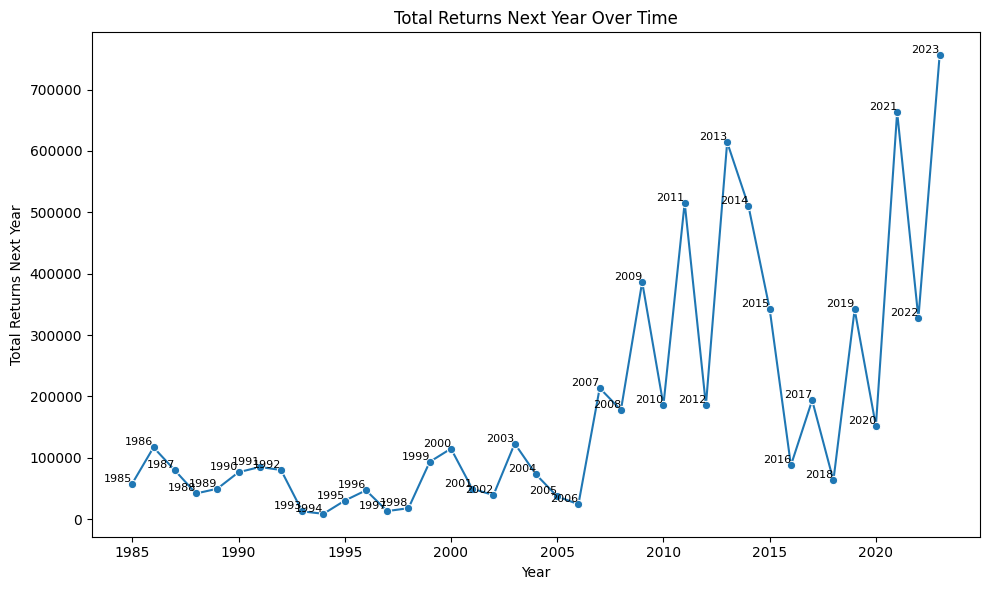

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Returns_NextYear', data=dfbts_he, marker='o')

# Add year labels to each point
for i in range(len(dfbts_he)):
    plt.text(
        x=dfbts_he['Year'].iloc[i], 
        y=dfbts_he['Total_Returns_NextYear'].iloc[i], 
        s=str(dfbts_he['Year'].iloc[i]),
        fontsize=8,
        ha='right',
        va='bottom'
    )

plt.title("Total Returns Next Year Over Time")
plt.xlabel("Year")
plt.ylabel("Total Returns Next Year")
plt.tight_layout()
plt.show()


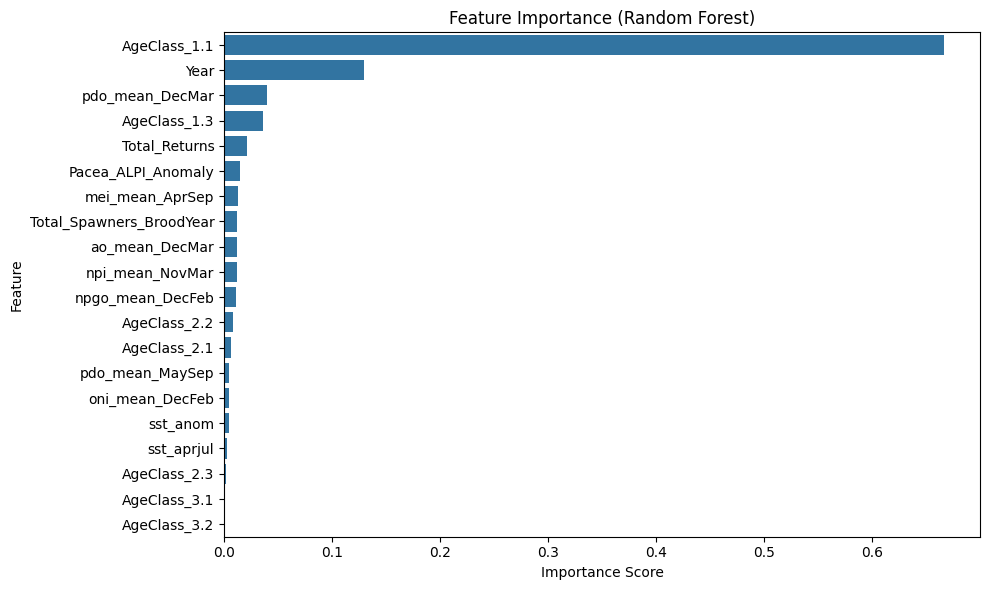

In [59]:
importances = model_rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_features = [feature_cols[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=sorted_features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


option 3.1
Random Forest model using only 5 important features 
['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [61]:
# STEP 1: Load and clean the dataset
dfrf_only5 = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [62]:
# Fill missing values
dfrf_only5['Pacea_ALPI_Anomaly'].fillna(dfrf_only5['Pacea_ALPI_Anomaly'].mean(), inplace=True)
dfrf_only5['Total_Spawners_BroodYear'].fillna(dfrf_only5['Total_Spawners_BroodYear'].mean(), inplace=True)

In [63]:
# Drop irrelevant columns
columns_to_drop = [
    'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4',
    'River'  # not needed for prediction
]
dfrf_only5 = dfrf_only5.drop(columns=columns_to_drop)

In [64]:
# STEP 2: Define features and target
selected_features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
target_col = 'Total_Returns_NextYear'

In [65]:
# Split the dataset
train_df = dfrf_only5[dfrf_only5['Year'] < 2023]
val_df = dfrf_only5[dfrf_only5['Year'] == 2023]

In [66]:
X_train = train_df[selected_features]
y_train = train_df[target_col]

X_val = val_df[selected_features]
y_val = val_df[target_col]

In [67]:
# STEP 3: Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
# STEP 4: Predict and evaluate
y_pred_2023 = model.predict(X_val)

In [69]:
print(f"Predicted Total_Returns_NextYear for 2023: {y_pred_2023[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_val.values[0]:,.0f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred_2023):,.2f}")
print(f"Percentage of Predicted to Actual for 2023: {round((y_pred_2023[0] / y_val.values[0]) * 100, 2)}%")

Predicted Total_Returns_NextYear for 2023: 558,452
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 197,457.23
Percentage of Predicted to Actual for 2023: 73.88%


3.1.1
adding a log transform
Random Forest model using only 5 important features
['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']

In [70]:
# STEP 1: Load and clean the dataset
dfrf_only5_log = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [71]:
# Fill missing values
dfrf_only5_log['Pacea_ALPI_Anomaly'].fillna(dfrf_only5_log['Pacea_ALPI_Anomaly'].mean(), inplace=True)
dfrf_only5_log['Total_Spawners_BroodYear'].fillna(dfrf_only5_log['Total_Spawners_BroodYear'].mean(), inplace=True)

In [72]:
# Drop irrelevant columns
columns_to_drop = [
    'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4',
    'River'
]
dfrf_only5_log = dfrf_only5_log.drop(columns=columns_to_drop)

In [73]:
# STEP 2: Define features and target
selected_features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
target_col = 'Total_Returns_NextYear'

In [74]:
# Split the dataset
train_df = dfrf_only5_log[dfrf_only5_log['Year'] < 2023]
val_df = dfrf_only5_log[dfrf_only5_log['Year'] == 2023]

X_train = train_df[selected_features]
y_train = np.log1p(train_df[target_col])  # log(1 + target)

X_val = val_df[selected_features]
y_val_real = val_df[target_col]  # keep original for comparison

In [75]:
# STEP 3: Train model on log-transformed target
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
# STEP 4: Predict and reverse log
y_pred_log_2023 = model.predict(X_val)
y_pred_2023 = np.expm1(y_pred_log_2023)  # inverse of log1p

In [77]:
# STEP 5: Evaluate
mae = mean_absolute_error(y_val_real, y_pred_2023)
percentage = round((y_pred_2023[0] / y_val_real.values[0]) * 100, 2)

print(f"Predicted Total_Returns_NextYear for 2023 (log corrected): {y_pred_2023[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_val_real.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"Percentage of Predicted to Actual for 2023: {percentage}%")

Predicted Total_Returns_NextYear for 2023 (log corrected): 545,149
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 210,759.74
Percentage of Predicted to Actual for 2023: 72.12%


option 3.2

In [78]:
# STEP 1: Load and clean the dataset
dfrf_only10 = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [79]:
# Fill missing values
dfrf_only10['Pacea_ALPI_Anomaly'].fillna(dfrf_only10['Pacea_ALPI_Anomaly'].mean(), inplace=True)
dfrf_only10['Total_Spawners_BroodYear'].fillna(dfrf_only10['Total_Spawners_BroodYear'].mean(), inplace=True)

In [80]:
# Drop unused columns
columns_to_drop = [
    'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4',
    'River'  # categorical and not useful for modeling
]
dfrf_only10 = dfrf_only10.drop(columns=columns_to_drop)

In [81]:
# STEP 2: Define top 10 features and target
top_10_features = [
    'AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3',
    'Total_Returns', 'Pacea_ALPI_Anomaly', 'mei_mean_AprSep',
    'Total_Spawners_BroodYear', 'ao_mean_DecMar', 'npi_mean_NovMar'
]
target_col = 'Total_Returns_NextYear'

In [82]:
# STEP 3: Split data
train_df = dfrf_only10[dfrf_only10['Year'] < 2023]
val_df = dfrf_only10[dfrf_only10['Year'] == 2023]

X_train = train_df[top_10_features]
y_train = train_df[target_col]

X_val = val_df[top_10_features]
y_val = val_df[target_col]

In [83]:
# STEP 4: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
# STEP 5: Predict and evaluate
y_pred_2023 = model.predict(X_val)

In [85]:
print(f"Predicted Total_Returns_NextYear for 2023: {y_pred_2023[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_val.values[0]:,.0f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred_2023):,.2f}")
print(f"Percentage of Predicted to Actual for 2023: {round((y_pred_2023[0] / y_val.values[0]) * 100, 2)}%")

Predicted Total_Returns_NextYear for 2023: 534,810
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 221,099.13
Percentage of Predicted to Actual for 2023: 70.75%


option 4

Mix Random Forest with XGBoost and average their outputs
Only top 5 features

In [86]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [87]:
# Load cleaned dataset with ReturnYear + ReturnCount
df_mix = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [88]:
# Fill missing values
df_mix['Pacea_ALPI_Anomaly'].fillna(df_mix['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_mix['Total_Spawners_BroodYear'].fillna(df_mix['Total_Spawners_BroodYear'].mean(), inplace=True)

In [89]:
# Drop irrelevant columns
columns_to_drop = [
    'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4',
    'River'
]
df_mix = df_mix.drop(columns=columns_to_drop)

# STEP 2: Define top 5 features and target
features = [
    'AgeClass_1.1',
    'Year',
    'pdo_mean_DecMar',
    'AgeClass_1.3',
    'Total_Returns'
]
target = 'Total_Returns_NextYear'

In [90]:
# STEP 3: Split into train/test
train_df = df_mix[df_mix['Year'] <= 2022]
test_df = df_mix[df_mix['Year'] == 2023]

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

In [91]:
# STEP 4: Train both models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [92]:
# STEP 5: Predict and blend
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

y_pred_blend = (y_pred_rf + y_pred_xgb) / 2

In [93]:
# STEP 6: Evaluate
mae = mean_absolute_error(y_test, y_pred_blend)
percent = round((y_pred_blend[0] / y_test.values[0]) * 100, 2)

print(f"Blended Prediction (Top 5 Features): {y_pred_blend[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% of Predicted to Actual: {percent}%")

Blended Prediction (Top 5 Features): 426,680
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 329,229.22
% of Predicted to Actual: 56.45%


Option 4.1
Mix Random Forest with XGBoost and average their outputs
using all features

In [94]:
# Load cleaned dataset with ReturnYear + ReturnCount
df_mix_all_features = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [95]:
# STEP 2: Fill missing values
df_mix_all_features['Pacea_ALPI_Anomaly'].fillna(df_mix_all_features['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_mix_all_features['Total_Spawners_BroodYear'].fillna(df_mix_all_features['Total_Spawners_BroodYear'].mean(), inplace=True)

In [96]:
# STEP 3: Drop only irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_mix_all_features = df_mix_all_features.drop(columns=columns_to_drop)

In [97]:
# STEP 4: Define target and features
target = 'Total_Returns_NextYear'
features = [col for col in df_mix_all_features.columns if col != target]

In [98]:
# STEP 5: Split train/test
train_df = df_mix_all_features[df_mix_all_features['Year'] <= 2022]
test_df = df_mix_all_features[df_mix_all_features['Year'] == 2023]

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

In [99]:
# STEP 6: Train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [100]:
# STEP 7: Predict and blend
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_blend = (y_pred_rf + y_pred_xgb) / 2

In [101]:
# STEP 8: Evaluate
mae = mean_absolute_error(y_test, y_pred_blend)
percent = round((y_pred_blend[0] / y_test.values[0]) * 100, 2)

print(f"Blended Prediction (All Features): {y_pred_blend[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% of Predicted to Actual: {percent}%")

Blended Prediction (All Features): 430,069
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 325,840.21
% of Predicted to Actual: 56.89%


Option 5
NN Neural Network - using TensorFlow

In [102]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [103]:
# STEP 1: Load and prepare data
df_nn = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')


In [104]:

df_nn['Pacea_ALPI_Anomaly'].fillna(df_nn['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_nn['Total_Spawners_BroodYear'].fillna(df_nn['Total_Spawners_BroodYear'].mean(), inplace=True)

In [105]:
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_nn = df_nn.drop(columns=columns_to_drop)

In [106]:
# Features and target
target_col = 'Total_Returns_NextYear'
features = [col for col in df_nn.columns if col != target_col]

# Train/test split
train_df = df_nn[df_nn['Year'] <= 2022]
val_df = df_nn[df_nn['Year'] == 2023]

X_train = train_df[features]
y_train = train_df[target_col]
X_val = val_df[features]
y_val = val_df[target_col]

In [107]:

# STEP 2: Scale features (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [108]:
# STEP 3: Build NN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(X_train_scaled, y_train, epochs=200, verbose=0)

c:\Users\MuriloFarias\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
# STEP 4: Predict and evaluate
y_pred_nn = model.predict(X_val_scaled)
mae = mean_absolute_error(y_val, y_pred_nn)
percent = round((y_pred_nn[0][0] / y_val.values[0]) * 100, 2)

print(f"NN Predicted Total_Returns_NextYear for 2023: {y_pred_nn[0][0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_val.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% of Predicted to Actual: {percent}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
NN Predicted Total_Returns_NextYear for 2023: 1,642
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 754,267.18
% of Predicted to Actual: 0.22%


Option 5.1
NN Neural Network using only top 5 important features
['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']

In [110]:
# STEP 1: Load and prepare data
df_nn_top5 = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [111]:
# Fill missing values
df_nn_top5['Pacea_ALPI_Anomaly'].fillna(df_nn_top5['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_nn_top5['Total_Spawners_BroodYear'].fillna(df_nn_top5['Total_Spawners_BroodYear'].mean(), inplace=True)

In [112]:
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_nn_top5 = df_nn_top5.drop(columns=columns_to_drop)

In [113]:
# STEP 2: Define Top 5 Features and Target
selected_features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
target_col = 'Total_Returns_NextYear'

In [114]:
# Split into train/test
train_df = df_nn_top5[df_nn_top5['Year'] <= 2022]
val_df = df_nn_top5[df_nn_top5['Year'] == 2023]

X_train = train_df[selected_features]
y_train = train_df[target_col]
X_val = val_df[selected_features]
y_val = val_df[target_col]

In [115]:
# STEP 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [116]:
# STEP 4: Build and train the NN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(X_train_scaled, y_train, epochs=200, verbose=0)

c:\Users\MuriloFarias\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
# STEP 5: Predict and evaluate
y_pred_nn = model.predict(X_val_scaled)
mae = mean_absolute_error(y_val, y_pred_nn)
percent = round((y_pred_nn[0][0] / y_val.values[0]) * 100, 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [118]:
print(f"NN Predicted Total_Returns_NextYear for 2023 (Top 5 Features): {y_pred_nn[0][0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_val.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% of Predicted to Actual: {percent}%")

NN Predicted Total_Returns_NextYear for 2023 (Top 5 Features): 477
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 755,432.12
% of Predicted to Actual: 0.06%


Option 6
Linear Regression


In [119]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [120]:
# STEP 1: Load and prepare data
df_lr = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [121]:
# Fill missing values
df_lr['Pacea_ALPI_Anomaly'].fillna(df_lr['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_lr['Total_Spawners_BroodYear'].fillna(df_lr['Total_Spawners_BroodYear'].mean(), inplace=True)

In [122]:
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_lr = df_lr.drop(columns=columns_to_drop)

In [123]:
# STEP 2: Select top 5 features
top_5_features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
target_col = 'Total_Returns_NextYear'

In [124]:
# STEP 3: Split into train/test
train_df = df_lr[df_lr['Year'] <= 2022]
test_df = df_lr[df_lr['Year'] == 2023]

X_train = train_df[top_5_features]
y_train = train_df[target_col]
X_test = test_df[top_5_features]
y_test = test_df[target_col]

In [125]:
# STEP 4: Scale features (optional but helps with interpretation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
# STEP 5: Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
# STEP 6: Predict and evaluate
y_pred = lr_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
percent = round((y_pred[0] / y_test.values[0]) * 100, 2)

In [128]:
print(f"Linear Regression Prediction for 2023: {y_pred[0]:,.0f}")
print(f"Actual: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% of Predicted to Actual: {percent}%")

Linear Regression Prediction for 2023: 563,289
Actual: 755,909
MAE: 192,619.99
% of Predicted to Actual: 74.52%


In [129]:
# STEP 7: Optional — Show feature influence
print("\n🔎 Feature Coefficients:")
for feature, coef in zip(top_5_features, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")


🔎 Feature Coefficients:
AgeClass_1.1: 107388.6159
Year: 40961.9517
pdo_mean_DecMar: -43507.2983
AgeClass_1.3: 52054.1490
Total_Returns: -8328.2095


Option 6.1
Linear Regression 
Using top 10 important features

In [130]:
# STEP 1: Load and prepare data
df_lr_top10 = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [131]:
# Fill missing values
df_lr_top10['Pacea_ALPI_Anomaly'].fillna(df_lr_top10['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_lr_top10['Total_Spawners_BroodYear'].fillna(df_lr_top10['Total_Spawners_BroodYear'].mean(), inplace=True)

In [132]:
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_lr_top10 = df_lr_top10.drop(columns=columns_to_drop)

In [133]:
# STEP 2: Select features and target
top_10_features = [
    'AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3',
    'Total_Returns', 'Pacea_ALPI_Anomaly', 'mei_mean_AprSep',
    'Total_Spawners_BroodYear', 'ao_mean_DecMar', 'npi_mean_NovMar'
]
target_col = 'Total_Returns_NextYear'

In [134]:

# STEP 3: Train/test split
train_df = df_lr_top10[df_lr_top10['Year'] <= 2022]
test_df = df_lr_top10[df_lr_top10['Year'] == 2023]

X_train = train_df[top_10_features]
y_train = train_df[target_col]
X_test = test_df[top_10_features]
y_test = test_df[target_col]

In [135]:

# STEP 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [136]:
# STEP 5: Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [137]:
# STEP 6: Predict and evaluate
y_pred = lr_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
percent = round((y_pred[0] / y_test.values[0]) * 100, 2)

print(f"Linear Regression Prediction for 2023: {y_pred[0]:,.0f}")
print(f"Actual Total_Returns_NextYear for 2023: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% of Predicted to Actual: {percent}%")

Linear Regression Prediction for 2023: 543,101
Actual Total_Returns_NextYear for 2023: 755,909
MAE: 212,808.45
% of Predicted to Actual: 71.85%


In [138]:

# STEP 7: Show feature coefficients
print("\n🔎 Feature Coefficients:")
for feature, coef in zip(top_10_features, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")



🔎 Feature Coefficients:
AgeClass_1.1: 102080.3793
Year: 36697.4966
pdo_mean_DecMar: -35994.4335
AgeClass_1.3: 51378.6014
Total_Returns: -4817.9161
Pacea_ALPI_Anomaly: -22455.1284
mei_mean_AprSep: -1021.4756
Total_Spawners_BroodYear: -15664.0281
ao_mean_DecMar: -21376.9377
npi_mean_NovMar: -3967.5260


Option 6.2
Linear Regression and Log Transformation

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
# Load data
df_log_lr = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [141]:
df_log_lr['Pacea_ALPI_Anomaly'].fillna(df_log_lr['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_log_lr['Total_Spawners_BroodYear'].fillna(df_log_lr['Total_Spawners_BroodYear'].mean(), inplace=True)
df_log_lr = df_log_lr.drop(columns=columns_to_drop)

In [142]:
features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
target = 'Total_Returns_NextYear'

In [143]:
train_df = df_log_lr[df_log_lr['Year'] <= 2022]
test_df = df_log_lr[df_log_lr['Year'] == 2023]

In [144]:
X_train = train_df[features]
y_train = np.log1p(train_df[target])  # log transform
X_test = test_df[features]
y_test_raw = test_df[target]

In [145]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [147]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [148]:
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error([y_test_raw.values[0]], [y_pred[0]])
percent = round((y_pred[0] / y_test_raw.values[0]) * 100, 2)

In [149]:
print("Linear Regression (Log Transformed)")
print(f"Prediction: {y_pred[0]:,.0f}")
print(f"Actual: {y_test_raw.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% Predicted to Actual: {percent}%\n")

Linear Regression (Log Transformed)
Prediction: 869,611
Actual: 755,909
MAE: 113,701.99
% Predicted to Actual: 115.04%



Option 7
Linear Regression top 3 important features

In [150]:
from sklearn.preprocessing import PolynomialFeatures

In [151]:
df_poly_lr = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [152]:
df_poly_lr['Pacea_ALPI_Anomaly'].fillna(df_poly_lr['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_poly_lr['Total_Spawners_BroodYear'].fillna(df_poly_lr['Total_Spawners_BroodYear'].mean(), inplace=True)
df_poly_lr = df_poly_lr.drop(columns=columns_to_drop)

In [153]:
features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar']
target = 'Total_Returns_NextYear'

In [154]:
train_df = df_poly_lr[df_poly_lr['Year'] <= 2022]
test_df = df_poly_lr[df_poly_lr['Year'] == 2023]

In [155]:
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [158]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
percent = round((y_pred[0] / y_test.values[0]) * 100, 2)

In [159]:
print("Polynomial Regression (Top 3 Features)")
print(f"Prediction: {y_pred[0]:,.0f}")
print(f"Actual: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% Predicted to Actual: {percent}%")

Polynomial Regression (Top 3 Features)
Prediction: 625,980
Actual: 755,909
MAE: 129,928.92
% Predicted to Actual: 82.81%


Option 7.1

In [160]:
# STEP 1: Load and prepare data
df_poly_top5 = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [161]:
# Fill missing values
df_poly_top5['Pacea_ALPI_Anomaly'].fillna(df_poly_top5['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_poly_top5['Total_Spawners_BroodYear'].fillna(df_poly_top5['Total_Spawners_BroodYear'].mean(), inplace=True)

In [162]:
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_poly_top5 = df_poly_top5.drop(columns=columns_to_drop)

In [163]:
# STEP 2: Define top 5 features and target
features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
target = 'Total_Returns_NextYear'

In [164]:
# STEP 3: Split train/test
train_df = df_poly_top5[df_poly_top5['Year'] <= 2022]
test_df = df_poly_top5[df_poly_top5['Year'] == 2023]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [165]:
# STEP 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
# STEP 5: Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [167]:
# STEP 6: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [168]:
# STEP 7: Predict and evaluate
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
percent = round((y_pred[0] / y_test.values[0]) * 100, 2)

print("Polynomial Regression (Top 5 Features)")
print(f"Prediction: {y_pred[0]:,.0f}")
print(f"Actual: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% Predicted to Actual: {percent}%")

Polynomial Regression (Top 5 Features)
Prediction: 693,756
Actual: 755,909
MAE: 62,153.43
% Predicted to Actual: 91.78%


Option 7.2
Polynomial Regression 
Using all features

In [186]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [170]:
# STEP 1: Load and prepare data
df_poly_all = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [171]:
# Fill missing values
df_poly_all['Pacea_ALPI_Anomaly'].fillna(df_poly_all['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_poly_all['Total_Spawners_BroodYear'].fillna(df_poly_all['Total_Spawners_BroodYear'].mean(), inplace=True)

In [172]:
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_poly_all = df_poly_all.drop(columns=columns_to_drop)

In [173]:
# STEP 2: Define features and target
target = 'Total_Returns_NextYear'
features = [col for col in df_poly_all.columns if col != target]

In [174]:

# STEP 3: Split train/test
train_df = df_poly_all[df_poly_all['Year'] <= 2022]
test_df = df_poly_all[df_poly_all['Year'] == 2023]

In [175]:
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [176]:
# STEP 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
# STEP 5: Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False) #maybe should try degree=3 but memory and can cause overfitting
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [178]:
# STEP 6: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# STEP 7: Predict and evaluate
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
percent = round((y_pred[0] / y_test.values[0]) * 100, 2)

print("Polynomial Regression (All Features)")
print(f"Prediction: {y_pred[0]:,.0f}")
print(f"Actual: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% Predicted to Actual: {percent}%")


Polynomial Regression (All Features)
Prediction: 718,542
Actual: 755,909
MAE: 37,366.95
% Predicted to Actual: 95.06%


In [206]:
# STEP A: Get actual 2024 target value from original 2023 row
actual_2024_value = df_poly_all.loc[df_poly_all['Year'] == 2023, 'Total_Returns_NextYear'].values[0]

In [212]:
actual_2024_value

np.float64(755909.0)

In [208]:
# STEP B: Simulate 2024 input row using 2023 row
simulated_2024_row = X_test.copy()
simulated_2024_row['Year'] = 2024
simulated_2024_row['Total_Returns_NextYear'] = actual_2024_value  # dynamically assigned

In [209]:
# STEP C: Prepare features for prediction
X_2025_input = simulated_2024_row[features]
X_2025_scaled = scaler.transform(X_2025_input)
X_2025_poly = poly.transform(X_2025_scaled)

In [216]:
# STEP D: Predict 2025
y_pred_2025 = model.predict(X_2025_poly)

# STEP E: Output result
print(f"Predicted Total_Returns_NextYear 2025): {y_pred_2025[0]:,.0f}")

Predicted Total_Returns_NextYear 2025): 679,553


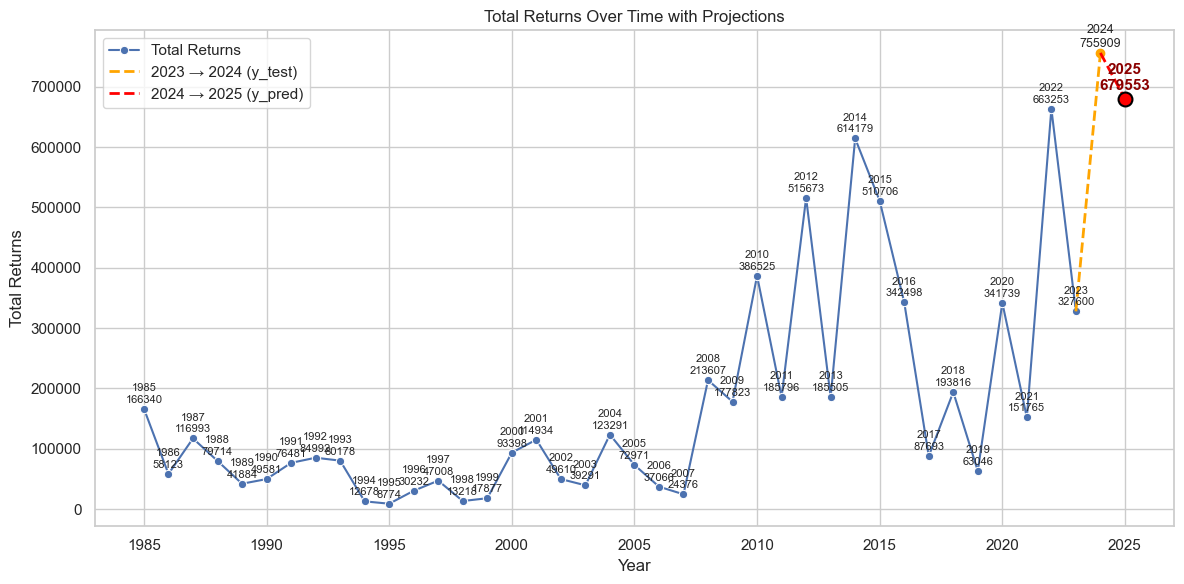

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use full dataset
df_plot = df_poly_all[['Year', 'Total_Returns']].copy()

# Step 2: Plot actual data (all years)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total_Returns', data=df_plot, marker='o', label='Total Returns')

# Step 3: Labels for actual points
for i in range(len(df_plot)):
    year = int(df_plot['Year'].iloc[i])
    value = df_plot['Total_Returns'].iloc[i]
    plt.text(year, value + 10000, f"{year}\n{int(value)}", fontsize=8, ha='center')

# Step 4: Manual line from 2023 → 2024
year_2023 = 2023
value_2023 = df_poly_all[df_poly_all['Year'] == 2023]['Total_Returns'].values[0]
year_2024 = 2024
value_2024 = y_test.values[0]
plt.plot([year_2023, year_2024], [value_2023, value_2024], 'orange', linestyle='--', linewidth=2, label='2023 → 2024 (y_test)')

# Label for 2024 (y_test)
plt.scatter(year_2024, value_2024, color='orange')
plt.text(year_2024, value_2024 + 10000, f"{year_2024}\n{int(value_2024)}", fontsize=9, ha='center')

# Step 5: Manual line from 2024 → 2025
year_2025 = 2025
value_2025 = y_pred_2025[0]
plt.plot([year_2024, year_2025], [value_2024, value_2025], 'red', linestyle='--', linewidth=2, label='2024 → 2025 (y_pred)')

# Step 6: Bold and highlight 2025 predicted point
plt.scatter(year_2025, value_2025, color='red', s=100, edgecolors='black', linewidths=1.5, zorder=5)
plt.text(year_2025, value_2025 + 15000, f"{year_2025}\n{int(value_2025)}",
         fontsize=11, fontweight='bold', ha='center', color='darkred')

# Final formatting
plt.title("Total Returns Over Time with Projections")
plt.xlabel("Year")
plt.ylabel("Total Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


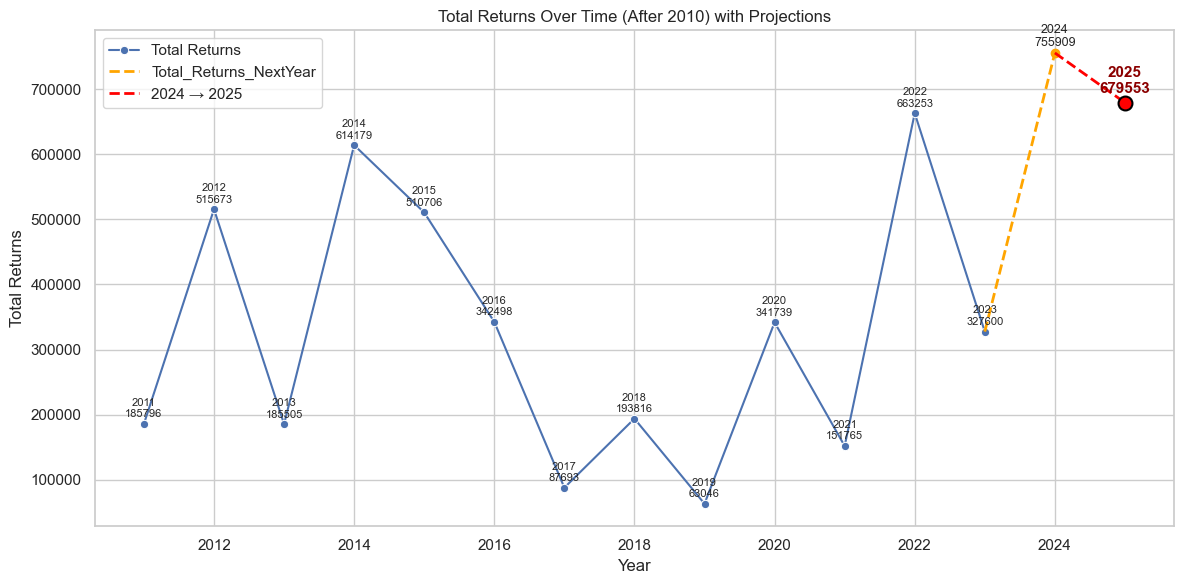

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter data from 2010 onward
df_filtered = df_poly_all[df_poly_all['Year'] > 2010].copy()


# Step 2: Plot actual data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total_Returns', data=df_filtered, marker='o', label='Total Returns')

# Step 3: Labels for actual points
for i in range(len(df_filtered)):
    year = int(df_filtered['Year'].iloc[i])
    value = df_filtered['Total_Returns'].iloc[i]
    plt.text(year, value + 10000, f"{year}\n{int(value)}", fontsize=8, ha='center')

# Step 4: Manual line from 2023 → 2024
year_2023 = 2023
value_2023 = df_poly_all[df_poly_all['Year'] == 2023]['Total_Returns'].values[0]
year_2024 = 2024
value_2024 = y_test.values[0]
plt.plot([year_2023, year_2024], [value_2023, value_2024], 'orange', linestyle='--', linewidth=2, label='Total_Returns_NextYear')

# 🔹 Add label for 2024 (y_test)
plt.scatter(year_2024, value_2024, color='orange')
plt.text(year_2024, value_2024 + 10000, f"{year_2024}\n{int(value_2024)}", fontsize=9, ha='center')

# Step 5: Manual line from 2024 → 2025
year_2025 = 2025
value_2025 = y_pred_2025[0]
plt.plot([year_2024, year_2025], [value_2024, value_2025], 'red', linestyle='--', linewidth=2, label='2024 → 2025')


# Step 6: Highlight 2025 predicted point (with bold label and emphasis)
plt.scatter(year_2025, value_2025, color='red', s=100, edgecolors='black', linewidths=1.5, zorder=5)
plt.text(year_2025, value_2025 + 15000, f"{year_2025}\n{int(value_2025)}",
         fontsize=11, fontweight='bold', ha='center', color='darkred')


# Final formatting
plt.title("Total Returns Over Time (After 2010) with Projections")
plt.xlabel("Year")
plt.ylabel("Total Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# STEP 1: Load and prepare data
df_poly_all = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')
# Fill missing values
df_poly_all['Pacea_ALPI_Anomaly'].fillna(df_poly_all['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_poly_all['Total_Spawners_BroodYear'].fillna(df_poly_all['Total_Spawners_BroodYear'].mean(), inplace=True)
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_poly_all = df_poly_all.drop(columns=columns_to_drop)

# STEP 2: Define features and target
target = 'Total_Returns_NextYear'
features = [col for col in df_poly_all.columns if col != target]

# STEP 3: Split train/test
train_df = df_poly_all[df_poly_all['Year'] <= 2022]
test_df = df_poly_all[df_poly_all['Year'] == 2023]
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]
# STEP 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# STEP 5: Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False) #maybe should try degree=3 but memory and can cause overfitting
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# STEP 6: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)


# STEP 7: Predict and evaluate
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
percent = round((y_pred[0] / y_test.values[0]) * 100, 2)

print("Polynomial Regression (All Features)")
print(f"Prediction: {y_pred[0]:,.0f}")
print(f"Actual: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% Predicted to Actual: {percent}%")


# STEP A: Get actual 2024 target value from original 2023 row
actual_2024_value = df_poly_all.loc[df_poly_all['Year'] == 2023, 'Total_Returns_NextYear'].values[0]

actual_2024_value

# STEP B: Simulate 2024 input row using 2023 row
simulated_2024_row = X_test.copy()
simulated_2024_row['Year'] = 2024
simulated_2024_row['Total_Returns_NextYear'] = actual_2024_value  # dynamically assigned

# STEP C: Prepare features for prediction
X_2025_input = simulated_2024_row[features]
X_2025_scaled = scaler.transform(X_2025_input)
X_2025_poly = poly.transform(X_2025_scaled)

# STEP D: Predict 2025
y_pred_2025 = model.predict(X_2025_poly)

# STEP E: Output result
print(f"Predicted Total_Returns_NextYear 2025): {y_pred_2025[0]:,.0f}")



Option 8:
Ridge Regression
Using top 5 features

In [ ]:
# Load dataset
df_ridge = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

In [ ]:
# Fill missing values
df_ridge['Pacea_ALPI_Anomaly'].fillna(df_ridge['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_ridge['Total_Spawners_BroodYear'].fillna(df_ridge['Total_Spawners_BroodYear'].mean(), inplace=True)

In [ ]:
# Drop irrelevant columns
columns_to_drop = [
    'River', 'sss_aprjun', 'sss_mayaug',
    'AgeClass_0.1', 'AgeClass_0.2', 'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5',
    'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.4', 'AgeClass_3.4'
]
df_ridge = df_ridge.drop(columns=columns_to_drop)

In [ ]:
# Top 5 features
features = ['AgeClass_1.1', 'Year', 'pdo_mean_DecMar', 'AgeClass_1.3', 'Total_Returns']
target = 'Total_Returns_NextYear'

In [ ]:
# Split
train_df = df_ridge[df_ridge['Year'] <= 2022]
test_df = df_ridge[df_ridge['Year'] == 2023]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [ ]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

In [ ]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
percent = round((y_pred[0] / y_test.values[0]) * 100, 2)

print("Ridge Regression")
print(f"Prediction: {y_pred[0]:,.0f}")
print(f"Actual: {y_test.values[0]:,.0f}")
print(f"MAE: {mae:,.2f}")
print(f"% Predicted to Actual: {percent}%\n")